In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
# input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
input_str = clean_text_for_pattern_letter(template_str, out_len=500)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
500
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [51]:
def predict_train(input_str, 
                  letters, 
                  history_idx: int = 0, 
                  max_index: int = 4,):
    WIN: dict[str, dict[str, int]] = {}
    HW: dict[str, int] = {}
    W: dict[str, dict[str, dict[int, int]]] = {} 
    
    IDX: list = []

    for letter in letters:
        WIN.setdefault(letter, {})

        for idx in range(max_index):
            WIN[letter].setdefault(idx, 0)
    
    prev_index = 0

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= history_idx:
            WIN[inp][prev_index] += 1
            continue
        
        IDX.append(prev_index)

        prev_idx = inp_idx - 1 - history_idx
        prev_inp = input_str[prev_idx]

        key_HW = prev_inp + str(prev_index) + ':' + inp

        inp_min_index = 0
        if HW.get(key_HW, -1) != -1:
            inp_min_index = HW[key_HW]
        else:
            inp_min_index = min(WIN[inp], key=WIN[inp].get)
            WIN[inp][inp_min_index] += 1

            HW.setdefault(key_HW, inp_min_index)

        key_I = prev_inp + str(prev_index)
        W.setdefault(key_I, {})
        W[key_I].setdefault(inp, {})
        W[key_I][inp].setdefault(inp_min_index, 0)
        W[key_I][inp][inp_min_index] += 1

        # recursion
        prev_index = inp_min_index
    
    return W, HW, IDX


# W, HW, IDX = predict_train(input_str, letters, history_idx=0, max_index=max_index_L1)
# for wk, wv in W.items():
#     print(wk, wv)

In [ ]:
def history_predict_train(input_str, letters, max_index = 4, max_history = 4):
    HistoryHW: list[dict[str, int]] = []
    HistoryW: list[dict[str, dict[str, dict[int, int]]]] = []

    for history_idx in range(max_history):
        W, HW, IDX = predict_train(input_str, letters, history_idx=history_idx, max_index=max_index)

        HistoryHW.append(HW)
        HistoryW.append(W)

    return HistoryW, HistoryHW

max_index_L1 = 16
max_history_L1 = 4

HistoryW, HistoryHW = history_predict_train(input_str, letters, max_index = max_index_L1, max_history = max_history_L1)

for W_idx, W in enumerate(HistoryW):
    print(f'{W_idx=}')

    for wk, wv in W.items():
        print(wk, wv)

In [53]:
def predict(input_str: str, letters: list, W: dict[str, dict[str, dict[int, int]]], HW: dict[str, int], max_index=4):
    err = 0

    indices = [x for x in range(max_index)]

    for inp_idx, inp in enumerate(input_str[:-1]):
        key_I = inp + str(indices[0])
        O = W.get(key_I, {})

        for index in indices[1:]:
            # print(O)
            # print()
            key_I = inp + str(index)

            index_O = W.get(key_I, {})

            for key, val in index_O.items():
                O.setdefault(key, {})
                O[key].update(val)

        # print(O)
        # print()
        max_symbol = 'a'
        max_symbol_index = 0
        max_val = 0
        for key, val in O.items():
            max_idx = max(val, key=val.get)
            O[key] = {max_idx: val[max_idx]}

            if val[max_idx] > max_val:
                max_val = val[max_idx]
                max_symbol_index = max_idx
                max_symbol = key

        # print(O)
        next_inp = input_str[inp_idx + 1]
        print(max_symbol, next_inp, max_symbol_index, max_val)

        # recurtion
        indices = [max_symbol_index]

        # err
        if max_symbol != next_inp:
            err += 1

            index_stats = O.get(next_inp, 0)
            
            if index_stats == 0:
                indices = [x for x in range(max_index)]
                print(f'{indices=}')
            else:
                max_symbol_index = list(index_stats.keys())[0]

                indices = [max_symbol_index]

    return err

err_L1 = predict(input_str, letters, W, HW, max_index=max_index_L1)

print(err_L1, err_L1 / (len(input_str) / 100))

t h 0 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  a 3 2
  p 5 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  t 0 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
e e 9 2
o r 11 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    1 1
e i 13 2
s n 9 2
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
e   11 2
  w 12 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
h h 2 1
  i 2 2
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
o c 0 2
t h 2 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    3 2
a w 1 2
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
h e 2 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    15 3
  a 9 1
b r 2 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  e 1 1
l   0 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
h i 13 2
e n 11 1
indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [54]:
def get_TF(input_str: str, W: dict[str, dict[str, int]], IDX: list):
    TF = []

    for inp_idx, inp in enumerate(input_str[:-1]):
        index = IDX[inp_idx]

        key_I = inp + str(index)
        I = W[key_I]

        tf = len(I)

        TF.append(tf)
    
    TF.append(0)

    return TF

TF = get_TF(input_str, W, IDX)
print(TF)

KeyError: 'c2'

In [ ]:
def get_word_stats(input_str: str | list, TF: list, ):
    buffer: list = [input_str[0]]
    WordStats: dict[str, int] = {}

    prev_tf = TF[0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        if TF[inp_idx] - prev_tf > 0.0: # and abs(TF[inp_idx] - prev_tf) > 0.2:
            word = ''.join(buffer)

            WordStats.setdefault(word, 0)
            WordStats[word] += 1

            buffer = [inp]
            prev_tf = TF[inp_idx]
            
            continue

        buffer.append(inp)
        prev_tf = TF[inp_idx]
    
    # sort
    WordStats = dict(sorted(WordStats.items(), key=lambda item: item[1], reverse=True))

    return WordStats

WordStats_L1 = get_word_stats(input_str=input_str, TF=TF)
print(len(WordStats_L1))
mean_WS = np.mean(np.array(list(WordStats_L1.values())))
print(f'{mean_WS=}')
WS_len = 0
for key, val in WordStats_L1.items():
    if len(key.strip()) > 1 and val >= mean_WS:
        WS_len += 1
    print(key, val)
print(f'{WS_len=}')

102
mean_WS=1.7352941176470589
e 16
 h 8
 th 6
 w 5
 b 4
t 4
 is 4
 to 3
 p 3
 a 3
nd 3
 and 3
er 3
 c 3
om 3
 bump 3
 of 3
 r 3
 f 3
 introduc 2
ed 2
 t 2
ooh 2
 d 2
ow 2
ns 2
 as 2
 s 2
els 2
 that 2
chap 1
ter 1
 in 1
hic 1
h 1
 are 1
 wi 1
nnie 1
he 1
 som 1
ees 1
e s 1
ories 1
eg 1
in 1
 edw 1
ard 1
ear 1
ing 1
tairs 1
 now 1
 on 1
 back 1
 his 1
ead 1
ehi 1
 chris 1
toph 1
obin 1
 i 1
 far 1
 kn 1
ows 1
 only 1
 way 1
oming 1
ta 1
irs 1
 but 1
et 1
im 1
es 1
 ther 1
eally 1
 anoth 1
ay 1
 if 1
 o 1
nly 1
ould 1
op 1
 bumpi 1
ng 1
or 1
 m 1
ent 1
hink 1
 it 1
en 1
erhaps 1
 there 1
 isn' 1
 any 1
how 1
ere 1
 at 1
 bottom 1
eady 1
 be 1
 y 1
ou 1
inni 1
WS_len=17


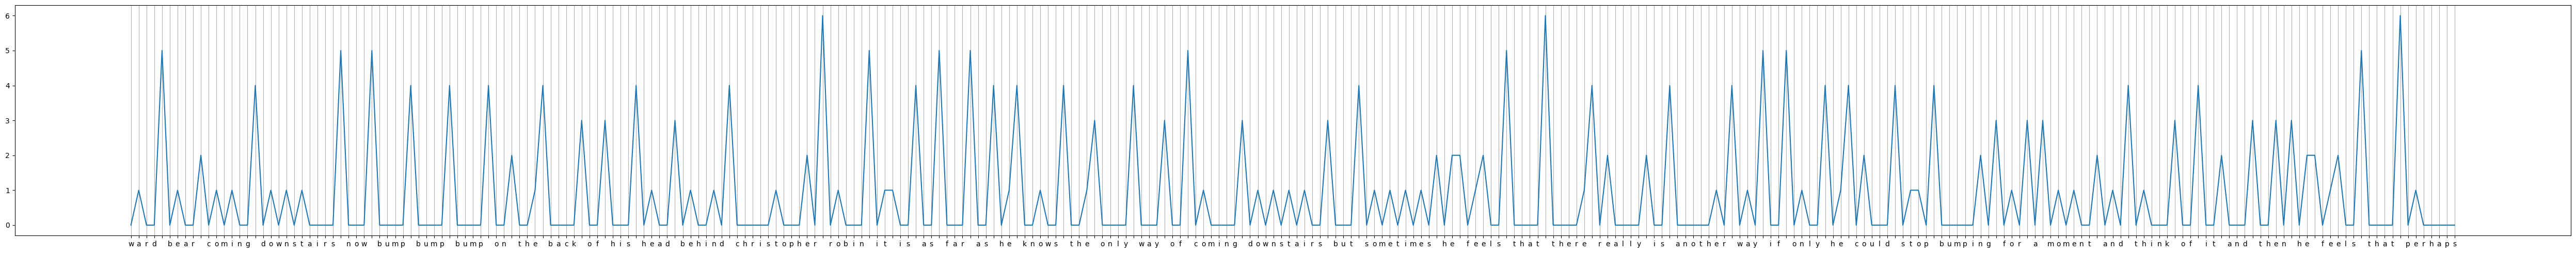

In [ ]:
begin = 100
length = 400

arr_TF = np.array(TF, dtype=float)

arr_TF = np.pad(arr_TF, (1, 0))[:-1] - arr_TF
arr_TF[arr_TF > 0] = 0
arr_TF = np.abs(arr_TF)

arr_TF = arr_TF[begin:length]

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
axs.plot(np.arange(arr_TF.size), arr_TF)
axs.xaxis.set_ticks(np.arange(len(input_str[begin:length])) ,input_str[begin:length])
axs.xaxis.grid(True)

plt.show()